# Credit EDA Case Study <br> <br> <h5> Meha RUSIA </h5>

#### <h3>Problem Statement -</h3> <br>

<h5>Introduction -</h5><br><h6> This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, we develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.</h6><br>
<h4>Business Objectives -</h4> 
<br><h6> This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.<br><h6>In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

####  1. LOADING LIBRARIES<br> 2. FILTER WARNING <br> 3. SET MAX ROW AND COLUMNS

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)

#### Read Application Data CSV File

In [2]:
df= pd.read_csv(r"C:\Users\Meha Rusia\Desktop\EDA Assignment\Credit EDA Case Study-20220222T161749Z-001\Credit EDA Case Study\application_data.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

 <p style="color:blue"> Result :- Data frame has 307511 rows and  122 columns.

#### General Information About Application Data 

In [3]:
df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

<p style="color:blue"> After Observing Data Type float64(65), int64(41), object(16) but some columns need to be change Datatype

#### Checking Quality Of Given Dataset and Null Values For All Columns

In [4]:
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

<p style="color:blue">INSIGHT: Lots of columns having null value but could be possible that some column have NAX or other <b>UNKNOWN </b>variable 

#### Droppind All Duplicata Data

In [5]:
df.shape

(307511, 122)

In [6]:
df.drop_duplicates().shape

(307511, 122)

<p style="color:blue">INSIGHT :- We can see there is <b>NO</b> duplicates in datafram 

#### Checking Null Values For All Columns, Checking Null Percentage(%) 

In [7]:
temp=(df.isnull().sum()*100/len(df)).sort_values(ascending=False).reset_index().rename(columns={"index":"column_name",0:"% of Missing Values"})
temp

,column_name,% of Missing Values
0,COMMONAREA_MEDI,69.872297
1,COMMONAREA_AVG,69.872297
2,COMMONAREA_MODE,69.872297
3,NONLIVINGAPARTMENTS_MODE,69.432963
4,NONLIVINGAPARTMENTS_AVG,69.432963
5,NONLIVINGAPARTMENTS_MEDI,69.432963
6,FONDKAPREMONT_MODE,68.386172
7,LIVINGAPARTMENTS_MODE,68.354953
8,LIVINGAPARTMENTS_AVG,68.354953
9,LIVINGAPARTMENTS_MEDI,68.354953


<p style="color:blue">INSIGHT : If 50% Data Value is Missing So Dropping That Columns

In [8]:
drop_col=list(temp[temp["% of Missing Values"]>=40]["column_name"])
drop_col

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATIO

In [9]:
df1=df.drop(drop_col,axis=1)
df1.shape

(307511, 73)

<p style="color:blue"> INSIGHT :- 1.We Have Droped All Columns Which Have Null Value Is More Than 40%<BR>2.New DataFram Name is <b>"df1"</b> And Now We Have 73 Columns.

In [10]:
#New Database
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0

In [11]:
null1=list(temp[temp["% of Missing Values"]<13]["column_name"] )
null2=list(temp[temp["% of Missing Values"]>0]["column_name"])
null1_as_set = set(null1)
intersection =null1_as_set.intersection(null2)
intersection  #null value geater than 0% and less than 13%

{'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'NAME_TYPE_SUITE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE'}

<p style="color:blue">INSIGHT : These Column Value Need To Be Fixed As They Have less than 13% Missing Values

#### Checking For Unique Values,UnknownValue,Value Counts Null Values And Fixing Them For All Columns. 

In [12]:
df1["SK_ID_CURR"].isnull().sum()

0

In [13]:
df1["TARGET"].isnull().sum()

0

In [14]:
df1["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [15]:
df1["NAME_CONTRACT_TYPE"].isnull().sum()

0

In [16]:
df1["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [17]:
df1["CODE_GENDER"].isnull().sum() 

0

In [18]:
df1["CODE_GENDER"].unique()   #XNA is not any gender so replacing it with "F" (Female) as they are in large numbers 

array(['M', 'F', 'XNA'], dtype=object)

In [19]:
df1["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [20]:
df1["CODE_GENDER"]=df1["CODE_GENDER"].replace(['F','M','XNA'],['Female','Male','Female'])

In [21]:
df1["CODE_GENDER"].value_counts()

Female    202452
Male      105059
Name: CODE_GENDER, dtype: int64

<p style="color:blue"> INSIGHT : Intresting fact is that gender column do not have any NULL value but when I check their unique value I found <b>XNA</b> so Replace it with <b>F</b> as females are more than males and also convert<b> F </b>to <b>Female </b>and<b> M </b>to <b>Male</b>                               

In [22]:
df1["FLAG_OWN_CAR"].isnull().sum()

0

In [23]:
df1["FLAG_OWN_CAR"].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [24]:
df1["FLAG_OWN_REALTY"].isnull().sum()

0

In [25]:
df1["FLAG_OWN_REALTY"].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [26]:
df1["CNT_CHILDREN"].unique()

array([ 0,  1,  2,  3,  4,  7,  5,  6,  8,  9, 11, 12, 10, 19, 14],
      dtype=int64)

In [27]:
df1["AMT_INCOME_TOTAL"].isnull().sum()

0

In [28]:
df1["AMT_INCOME_TOTAL"].unique()

array([202500. , 270000. ,  67500. , ...,  96768. , 546250.5, 113062.5])

In [29]:
df1["AMT_CREDIT"].isnull().sum()

0

In [30]:
df1["AMT_CREDIT"].unique()

array([ 406597.5, 1293502.5,  135000. , ...,  181989. ,  743863.5,
       1391130. ])

In [31]:
df1["AMT_ANNUITY"].isnull().sum()  

12

<AxesSubplot:xlabel='AMT_ANNUITY'>

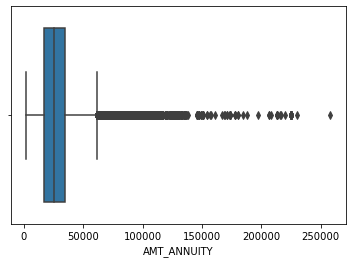

In [32]:
sns.boxplot(df1["AMT_ANNUITY"])

<p style="color:blue"> <b>Approch :</b> AS we can see AMT_ANNUITY column has lots of <b>outliers</b> so with outliers mean is heighly affacted with the outliers <b>Median </b>is less affected so here I will replace all null values with median

In [33]:
df1["AMT_ANNUITY"].median()

24903.0

In [34]:
df1["AMT_ANNUITY"]=df1["AMT_ANNUITY"].fillna(24903.0)

<p style="color:blue"> <b>Insight :</b> in "AMT_ANNUITY" column all the Null values is fill with <b> 24903.0 </b> as its median value.

In [35]:
df1["AMT_GOODS_PRICE"].isnull().sum()

278

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

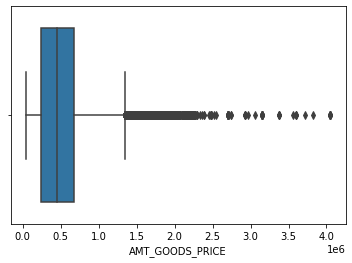

In [36]:
sns.boxplot(df1["AMT_GOODS_PRICE"])

<p style="color:blue"> <b>Approch : </b> With the Boxplot  for AMT_GOODS_PRICE we can see there is lots of outliers.when the data has more outlier, its best to replace them with <b>Median</b> value as they are less affected by outliers

In [37]:
df1["AMT_GOODS_PRICE"].median()

450000.0

In [38]:
df1["AMT_GOODS_PRICE"]=df1["AMT_GOODS_PRICE"].fillna(450000.0)

<p style="color:blue"> <b>Insight :</b> in "AMT_GOODS_PRICE" column all the Null values is fill with by<b> 450000.0 </b> as its median value.

In [39]:
df1["NAME_TYPE_SUITE"].isnull().sum()  # Not Important 

1292

In [40]:
df1["NAME_INCOME_TYPE"].isnull().sum()

0

In [41]:
df1["NAME_EDUCATION_TYPE"].isnull().sum()

0

In [42]:
df1["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [43]:
df1["NAME_FAMILY_STATUS"].isnull().sum()

0

In [44]:
df1["NAME_FAMILY_STATUS"].value_counts() #Unknown Value count 2

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

<p style="color:blue"> <b>Approch : </b>In NAME_FAMILY_STATUS column there is value <b>Unknown</b> here I am replacing it with <b>Married</b> as no. of value is maximum in married and 2 more valuelues does not make any affect

In [45]:
df1["NAME_FAMILY_STATUS"] = df1["NAME_FAMILY_STATUS"].replace(["Unknown"],"Married") 
df1["NAME_FAMILY_STATUS"].value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

In [46]:
df1["NAME_HOUSING_TYPE"].isnull().sum()

0

In [47]:
df1["NAME_HOUSING_TYPE"].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [48]:
df1["REGION_POPULATION_RELATIVE"].isnull().sum() # Not Important

0

In [49]:
df1["DAYS_BIRTH"].isnull().sum()

0

In [50]:
df1["DAYS_EMPLOYED"].isnull().sum()

0

In [51]:
df1["DAYS_EMPLOYED"].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694], dtype=int64)

In [52]:
df1["DAYS_REGISTRATION"].isnull().sum()

0

In [53]:
df1["DAYS_REGISTRATION"].unique()

array([ -3648.,  -1186.,  -4260., ..., -16396., -14558., -14798.])

In [54]:
df1["DAYS_ID_PUBLISH"].isnull().sum()

0

In [55]:
df1["DAYS_ID_PUBLISH"].isnull().sum()

0

In [56]:
df1["DAYS_ID_PUBLISH"].unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211], dtype=int64)

In [57]:
df1["FLAG_MOBIL"].isnull().sum()

0

In [58]:
df1["FLAG_MOBIL"].unique()

array([1, 0], dtype=int64)

In [59]:
df1["FLAG_MOBIL"].value_counts()

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64

In [60]:
df1["FLAG_EMP_PHONE"].isnull().sum()

0

In [61]:
df1["FLAG_EMP_PHONE"].value_counts()

1    252125
0     55386
Name: FLAG_EMP_PHONE, dtype: int64

In [62]:
df1["FLAG_WORK_PHONE"].isnull().sum()

0

In [63]:
df1["FLAG_WORK_PHONE"].value_counts()

0    246203
1     61308
Name: FLAG_WORK_PHONE, dtype: int64

In [64]:
df1["FLAG_CONT_MOBILE"].isnull().sum()

0

In [65]:
df1["FLAG_CONT_MOBILE"].value_counts()

1    306937
0       574
Name: FLAG_CONT_MOBILE, dtype: int64

In [66]:
df1["FLAG_PHONE"].isnull().sum()

0

In [67]:
df1["FLAG_PHONE"].value_counts()

0    221080
1     86431
Name: FLAG_PHONE, dtype: int64

In [68]:
df1["FLAG_EMAIL"].isnull().sum()

0

In [69]:
df1["FLAG_EMAIL"].value_counts()

0    290069
1     17442
Name: FLAG_EMAIL, dtype: int64

In [70]:
df1["OCCUPATION_TYPE"].isnull().sum() #large number of Null Values 

96391

In [71]:
df1[df1["OCCUPATION_TYPE"].isnull()].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,Female,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,Female,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,-5246.0,-2512,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.555183,0.652897,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,Female,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,-9012.0,-3684,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.624305,0.669057,0.0,0.0,0.0,0.0,-795.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
28,100033,0,Cash loans,Male,Y,Y,0,270000.000,790830.0,57676.5,675000.0,Unaccompanied,State servant,Higher education,Single / not married,House / apartment,0.046220,-9994,-1796,-4668.0,-2661,1,1,0,1,0,1,NaN,1.0,1,1,WEDNESDAY,11,0,1,1,0,0,0,Military,0.685011,0.524496,0.0,0.0,0.0,0.0,-849.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
30,100035,0,Cash loans,Female,N,Y,0,292500.000,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0


In [72]:
df1["OCCUPATION_TYPE"].value_counts() 

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

<p style="color:blue"> <b>Approch : </b>OCCUPATION_TYPE column has maximum number of NaN value and we can not replace it with Laborers as number of Nan is greater than number of Laborers so here creating <b>Other</b> category and fill null value with that. 

In [73]:
df1["OCCUPATION_TYPE"]=df1["OCCUPATION_TYPE"].fillna("Other")

In [74]:
df1["CNT_FAM_MEMBERS"].isnull().sum()

2

In [75]:
df1["CNT_FAM_MEMBERS"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  9.,  7.,  8., 10., 13., nan, 14.,
       12., 20., 15., 16., 11.])

In [76]:
df1["CNT_FAM_MEMBERS"].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
16.0         2
14.0         2
20.0         2
12.0         2
15.0         1
11.0         1
13.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

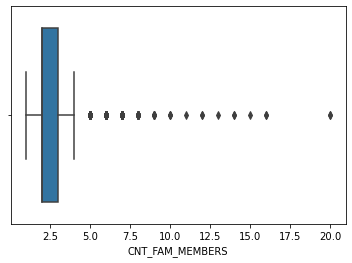

In [77]:
sns.boxplot(df1["CNT_FAM_MEMBERS"])

<p style="color:blue"> <b>Approch : </b>With the Boxplot  for CNT_FAM_MEMBERS we can see there is lots of outliers.when the data has more outlier, its best to replace them with <b>Median</b> value as they are less affected by outliers

In [78]:
df1["CNT_FAM_MEMBERS"].median()

2.0

In [79]:
df1["CNT_FAM_MEMBERS"]=df1["CNT_FAM_MEMBERS"].fillna(2.0)

<p style="color:blue"> <b>Insight : </b> Filling "nan" value with Median value <b>2.0</b>

In [80]:
df1["REGION_RATING_CLIENT"].isnull().sum()

0

In [81]:
df1["REGION_RATING_CLIENT"].value_counts()

2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64

In [82]:
df1["REGION_RATING_CLIENT_W_CITY"].isnull().sum()

0

In [83]:
df1["REGION_RATING_CLIENT_W_CITY"].value_counts()

2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [84]:
df1["WEEKDAY_APPR_PROCESS_START"].isnull().sum()

0

In [85]:
df1["WEEKDAY_APPR_PROCESS_START"].value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [86]:
df1["HOUR_APPR_PROCESS_START"].isnull().sum()

0

In [87]:
df1["HOUR_APPR_PROCESS_START"].value_counts()

10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64

In [88]:
df1["REG_REGION_NOT_LIVE_REGION"].isnull().sum()

0

In [89]:
df1["REG_REGION_NOT_LIVE_REGION"].value_counts()

0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

In [90]:
df1["REG_REGION_NOT_WORK_REGION"].isnull().sum()

0

In [91]:
df1["REG_REGION_NOT_WORK_REGION"].value_counts()

0    291899
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

In [92]:
df1["LIVE_REGION_NOT_WORK_REGION"].isnull().sum()

0

In [93]:
df1["LIVE_REGION_NOT_WORK_REGION"].value_counts()

0    295008
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

In [94]:
df1["REG_CITY_NOT_LIVE_CITY"].isnull().sum()

0

In [95]:
df1["REG_CITY_NOT_LIVE_CITY"].value_counts()

0    283472
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

In [96]:
df1["REG_CITY_NOT_WORK_CITY"].isnull().sum()

0

In [97]:
df1["REG_CITY_NOT_WORK_CITY"].value_counts()

0    236644
1     70867
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

In [98]:
df1["LIVE_CITY_NOT_WORK_CITY"].isnull().sum()

0

In [99]:
df1["LIVE_CITY_NOT_WORK_CITY"].value_counts()

0    252296
1     55215
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

In [100]:
df1["ORGANIZATION_TYPE"].isnull().sum()

0

In [101]:
df1["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

<p style="color:blue"> <b>INSIGHT : </b> ORGANIZATION_TYPE column has value XNA and replace it with others

In [102]:
df1["ORGANIZATION_TYPE"] = df1["ORGANIZATION_TYPE"].replace(["XNA"],"Others") 
df1["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
Others                    55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [103]:
df1["EXT_SOURCE_2"].isnull().sum()

660

In [104]:
df1["EXT_SOURCE_2"].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.157007      1
0.721955      1
0.032513      1
0.204329      1
0.064909      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

<AxesSubplot:xlabel='EXT_SOURCE_2'>

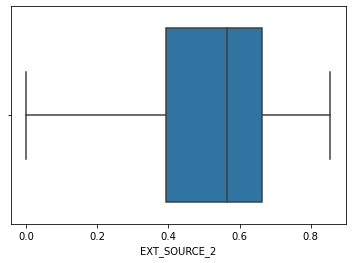

In [105]:
sns.boxplot(df1["EXT_SOURCE_2"])

<p style="color:blue"> <b>Approch : </b> There is no outlier so mean will be best approch to fill null value.

In [106]:
df1["EXT_SOURCE_2"].mean()

0.5143926741308463

In [107]:
df1["EXT_SOURCE_2"]=df1["EXT_SOURCE_2"].fillna(0.514392)

In [108]:
df1["EXT_SOURCE_3"].isnull().sum()

60965

<AxesSubplot:xlabel='EXT_SOURCE_3'>

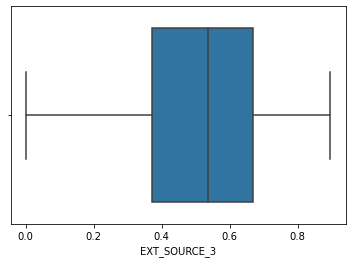

In [109]:
sns.boxplot(df1["EXT_SOURCE_3"])

<p style="color:blue"> <b>Approch : </b> There is no outlier so mean will be best approch to fill null value.

In [110]:
df1["EXT_SOURCE_3"].mean()

0.5108529061800121

In [111]:
df1["EXT_SOURCE_3"]=df1["EXT_SOURCE_3"].fillna(0.510852)

In [112]:
df1["OBS_30_CNT_SOCIAL_CIRCLE"].isnull().sum()

1021

In [113]:
df1["OBS_30_CNT_SOCIAL_CIRCLE"].value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
348.0         1
28.0          1
47.0          1
29.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

<AxesSubplot:xlabel='OBS_30_CNT_SOCIAL_CIRCLE'>

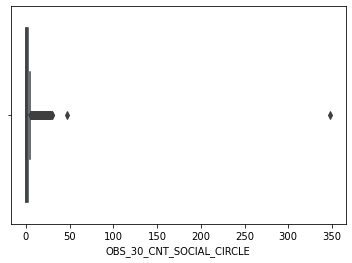

In [114]:
sns.boxplot(df1["OBS_30_CNT_SOCIAL_CIRCLE"])

<p style="color:blue"> <b>Approch : </b> There is outlier so median will be best approch to fill null value.

In [115]:
df1["OBS_30_CNT_SOCIAL_CIRCLE"].median()

0.0

In [116]:
df1["OBS_30_CNT_SOCIAL_CIRCLE"]=df1["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(0.0)

In [117]:
df1["DEF_30_CNT_SOCIAL_CIRCLE"].isnull().sum()

1021

In [118]:
df1["DEF_30_CNT_SOCIAL_CIRCLE"].value_counts()

0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
8.0          1
7.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [119]:
df1["OBS_60_CNT_SOCIAL_CIRCLE"].isnull().sum()

1021

In [120]:
df1["OBS_60_CNT_SOCIAL_CIRCLE"].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  21.,  15.,  22.,  16.,  20.,  25.,
        17.,  19.,  18.,  24.,  23.,  28.,  29.,  27.,  47., 344.,  30.,
        26.])

In [121]:
df1["DEF_60_CNT_SOCIAL_CIRCLE"].isnull().sum()

1021

In [122]:
df1["DEF_60_CNT_SOCIAL_CIRCLE"].unique()

array([ 2.,  0.,  1., nan,  3.,  5.,  4.,  7., 24.,  6.])

<AxesSubplot:xlabel='DEF_60_CNT_SOCIAL_CIRCLE'>

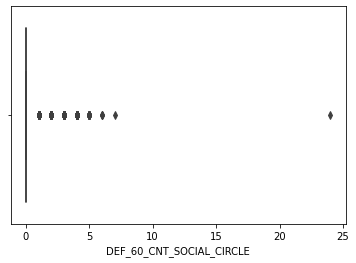

In [123]:
sns.boxplot(df1["DEF_60_CNT_SOCIAL_CIRCLE"])

In [124]:
df1["DAYS_LAST_PHONE_CHANGE"].isnull().sum()

1

In [125]:
df1["DAYS_LAST_PHONE_CHANGE"].value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-3747.0        1
-3999.0        1
-3607.0        1
-3915.0        1
-3752.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [126]:
df1["FLAG_DOCUMENT_2"].isnull().sum()

0

In [127]:
df1["FLAG_DOCUMENT_2"].value_counts()

0    307498
1        13
Name: FLAG_DOCUMENT_2, dtype: int64

In [128]:
df1["FLAG_DOCUMENT_3"].isnull().sum()

0

In [129]:
df1["FLAG_DOCUMENT_3"].value_counts()

1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64

In [130]:
df1["FLAG_DOCUMENT_4"].isnull().sum()

0

In [131]:
df1["FLAG_DOCUMENT_4"].value_counts()

0    307486
1        25
Name: FLAG_DOCUMENT_4, dtype: int64

In [132]:
df1["FLAG_DOCUMENT_5"].isnull().sum()

0

In [133]:
df1["FLAG_DOCUMENT_5"].value_counts()

0    302863
1      4648
Name: FLAG_DOCUMENT_5, dtype: int64

In [134]:
df1["FLAG_DOCUMENT_6"].isnull().sum()

0

In [135]:
df1["FLAG_DOCUMENT_6"].value_counts()

0    280433
1     27078
Name: FLAG_DOCUMENT_6, dtype: int64

In [136]:
df1["FLAG_DOCUMENT_7"].isnull().sum()

0

In [137]:
df1["FLAG_DOCUMENT_7"].value_counts()

0    307452
1        59
Name: FLAG_DOCUMENT_7, dtype: int64

In [138]:
df1["FLAG_DOCUMENT_8"].isnull().sum()

0

In [139]:
df1["FLAG_DOCUMENT_8"].value_counts()

0    282487
1     25024
Name: FLAG_DOCUMENT_8, dtype: int64

In [140]:
df1["FLAG_DOCUMENT_9"].isnull().sum()

0

In [141]:
df1["FLAG_DOCUMENT_9"].value_counts()

0    306313
1      1198
Name: FLAG_DOCUMENT_9, dtype: int64

In [142]:
df1["FLAG_DOCUMENT_10"].isnull().sum()

0

In [143]:
df1["FLAG_DOCUMENT_10"].value_counts()

0    307504
1         7
Name: FLAG_DOCUMENT_10, dtype: int64

In [144]:
df1["FLAG_DOCUMENT_11"].value_counts()

0    306308
1      1203
Name: FLAG_DOCUMENT_11, dtype: int64

In [145]:
df1["FLAG_DOCUMENT_12"].value_counts()

0    307509
1         2
Name: FLAG_DOCUMENT_12, dtype: int64

In [146]:
df1["FLAG_DOCUMENT_13"].value_counts()

0    306427
1      1084
Name: FLAG_DOCUMENT_13, dtype: int64

In [147]:
df1["FLAG_DOCUMENT_13"].value_counts()

0    306427
1      1084
Name: FLAG_DOCUMENT_13, dtype: int64

In [148]:
df1["FLAG_DOCUMENT_14"].value_counts()

0    306608
1       903
Name: FLAG_DOCUMENT_14, dtype: int64

In [149]:
df1["FLAG_DOCUMENT_15"].value_counts()

0    307139
1       372
Name: FLAG_DOCUMENT_15, dtype: int64

In [150]:
df1["FLAG_DOCUMENT_16"].value_counts()

0    304458
1      3053
Name: FLAG_DOCUMENT_16, dtype: int64

In [151]:
df1["FLAG_DOCUMENT_17"].value_counts()

0    307429
1        82
Name: FLAG_DOCUMENT_17, dtype: int64

In [152]:
df1["FLAG_DOCUMENT_18"].value_counts()

0    305011
1      2500
Name: FLAG_DOCUMENT_18, dtype: int64

In [153]:
df1["FLAG_DOCUMENT_19"].value_counts()

0    307328
1       183
Name: FLAG_DOCUMENT_19, dtype: int64

In [154]:
df1["FLAG_DOCUMENT_20"].value_counts()

0    307355
1       156
Name: FLAG_DOCUMENT_20, dtype: int64

In [155]:
df1["FLAG_DOCUMENT_21"].value_counts()

0    307408
1       103
Name: FLAG_DOCUMENT_21, dtype: int64

In [156]:
df1["AMT_REQ_CREDIT_BUREAU_HOUR"].isnull().sum()

41519

In [157]:
df1["AMT_REQ_CREDIT_BUREAU_HOUR"].unique()

array([ 0., nan,  1.,  2.,  3.,  4.])

In [158]:
df1["AMT_REQ_CREDIT_BUREAU_DAY"].isnull().sum()

41519

In [159]:
df1["AMT_REQ_CREDIT_BUREAU_DAY"].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  9.,  8.])

In [160]:
df1["AMT_REQ_CREDIT_BUREAU_WEEK"].isnull().sum()

41519

In [161]:
df1["AMT_REQ_CREDIT_BUREAU_WEEK"].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  8.,  7.])

In [162]:
df1["AMT_REQ_CREDIT_BUREAU_MON"].isnull().sum()

41519

In [163]:
df1["AMT_REQ_CREDIT_BUREAU_MON"].unique()

array([ 0., nan,  1.,  2.,  6.,  5.,  3.,  7.,  9.,  4., 11.,  8., 16.,
       12., 14., 10., 13., 17., 24., 19., 15., 23., 18., 27., 22.])

In [164]:
df1["AMT_REQ_CREDIT_BUREAU_QRT"].isnull().sum()

41519

In [165]:
df1["AMT_REQ_CREDIT_BUREAU_QRT"].unique()

array([  0.,  nan,   1.,   2.,   4.,   3.,   8.,   5.,   6.,   7., 261.,
        19.])

In [166]:
df1["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [167]:
df1["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum()

41519

In [168]:
df1["AMT_REQ_CREDIT_BUREAU_YEAR"].unique()

array([ 1.,  0., nan,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11.,
       13., 16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

#### Droping Unwanted Columns

In [169]:
df1.drop(["NAME_TYPE_SUITE","REGION_POPULATION_RELATIVE","FLAG_EMAIL","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION",\
          "REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_PHONE"],axis='columns', inplace=True)

In [170]:
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,Male,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,1,1,0,Laborers,1.0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,Cash loans,Female,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,1,1,0,Core staff,2.0,School,0.622246,0.510852,1.0,0.0,1.0,0.0,-828.0
2,100004,0,Revolving loans,Male,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,1,1,1,Laborers,1.0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0
3,100006,0,Cash loans,Female,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,1,1,0,Laborers,2.0,Business Entity Type 3,0.650442,0.510852,2.0,0.0,2.0,0.0,-617.0
4,100007,0,Cash loans,Male,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,1,1,0,Core staff,1.0,Religion,0.322738,0.510852,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,Male,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,-9327,-236,-8456.0,-1982,1,1,0,Sales staff,1.0,Services,0.681632,0.510852,0.0,0.0,0.0,0.0,-273.0
307507,456252,0,Cash loans,Female,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20775,365243,-4388.0,-4090,1,0,0,Other,1.0,Others,0.115992,0.510852,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,Female,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,-14966,-7921,-6737.0,-5150,1,1,0,Managers,1.0,School,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0
307509,456254,1,Cash loans,Female,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,-4786,-2562.0,-931,1,1,0,Laborers,2.0,Business Entity Type 1,0.514163,0.661024,0.0,0.0,0.0,0.0,-322.0


<p style="color:blue"> <b>Insight : </b> Here I dropped all columns which I am not going to use in my analysis.now new dataset has 307511 rows × 32 columns.

#### Removing negative values and convert them into year

In [171]:
df1[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]=df1[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].abs()

In [172]:
df1[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]=df1[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].apply(lambda x:x/365.25)

In [173]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SK_ID_CURR                307511 non-null  int64  
 1   TARGET                    307511 non-null  int64  
 2   NAME_CONTRACT_TYPE        307511 non-null  object 
 3   CODE_GENDER               307511 non-null  object 
 4   FLAG_OWN_CAR              307511 non-null  object 
 5   FLAG_OWN_REALTY           307511 non-null  object 
 6   CNT_CHILDREN              307511 non-null  int64  
 7   AMT_INCOME_TOTAL          307511 non-null  float64
 8   AMT_CREDIT                307511 non-null  float64
 9   AMT_ANNUITY               307511 non-null  float64
 10  AMT_GOODS_PRICE           307511 non-null  float64
 11  NAME_INCOME_TYPE          307511 non-null  object 
 12  NAME_EDUCATION_TYPE       307511 non-null  object 
 13  NAME_FAMILY_STATUS        307511 non-null  o

#### Correcting Data Type

In [174]:
df1.dtypes

SK_ID_CURR                    int64
TARGET                        int64
NAME_CONTRACT_TYPE           object
CODE_GENDER                  object
FLAG_OWN_CAR                 object
FLAG_OWN_REALTY              object
CNT_CHILDREN                  int64
AMT_INCOME_TOTAL            float64
AMT_CREDIT                  float64
AMT_ANNUITY                 float64
AMT_GOODS_PRICE             float64
NAME_INCOME_TYPE             object
NAME_EDUCATION_TYPE          object
NAME_FAMILY_STATUS           object
NAME_HOUSING_TYPE            object
DAYS_BIRTH                  float64
DAYS_EMPLOYED               float64
DAYS_REGISTRATION           float64
DAYS_ID_PUBLISH             float64
FLAG_MOBIL                    int64
FLAG_EMP_PHONE                int64
FLAG_WORK_PHONE               int64
OCCUPATION_TYPE              object
CNT_FAM_MEMBERS             float64
ORGANIZATION_TYPE            object
EXT_SOURCE_2                float64
EXT_SOURCE_3                float64
OBS_30_CNT_SOCIAL_CIRCLE    

In [175]:
int_coulumns=["SK_ID_CURR","TARGET","CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","CNT_FAM_MEMBERS",\
             "EXT_SOURCE_2","EXT_SOURCE_3","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE"]
df1[int_coulumns]=df1[int_coulumns].apply(pd.to_numeric)
df1.dtypes

SK_ID_CURR                    int64
TARGET                        int64
NAME_CONTRACT_TYPE           object
CODE_GENDER                  object
FLAG_OWN_CAR                 object
FLAG_OWN_REALTY              object
CNT_CHILDREN                  int64
AMT_INCOME_TOTAL            float64
AMT_CREDIT                  float64
AMT_ANNUITY                 float64
AMT_GOODS_PRICE             float64
NAME_INCOME_TYPE             object
NAME_EDUCATION_TYPE          object
NAME_FAMILY_STATUS           object
NAME_HOUSING_TYPE            object
DAYS_BIRTH                  float64
DAYS_EMPLOYED               float64
DAYS_REGISTRATION           float64
DAYS_ID_PUBLISH             float64
FLAG_MOBIL                    int64
FLAG_EMP_PHONE                int64
FLAG_WORK_PHONE               int64
OCCUPATION_TYPE              object
CNT_FAM_MEMBERS             float64
ORGANIZATION_TYPE            object
EXT_SOURCE_2                float64
EXT_SOURCE_3                float64
OBS_30_CNT_SOCIAL_CIRCLE    

In [176]:
#Changing columns name DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH ,DAYS_LAST_PHONE_CHANGE

In [177]:
df1=df1.rename(columns={"DAYS_BIRTH":"AGE","DAYS_EMPLOYED":"YEAR_EMPLOYED","DAYS_REGISTRATION":"YEARS_REGISTRATION","DAYS_ID_PUBLISH":"YEAR_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE":"YEAR_LAST_PHONE_CHANGE"})

#### Binning Variables 

In [178]:
df1["AMT_INCOME_TOTAL"].quantile([0,0.1,0.3,0.6,0.8])

0.0     25650.0
0.1     81000.0
0.3    112500.0
0.6    162000.0
0.8    225000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [179]:
# Binning 'AMT_INCOME_RANGE' based on quantiles
df1["AMT_INCOME_TOTAL"]= pd.qcut(df1.AMT_INCOME_TOTAL,q=[0,0.1,0.3,0.6,0.8,1],labels=["VeryLow","Low","Medium","High","VeryHigh"])

In [180]:
#Creating a new category based on income total
df1["AGE"].astype(int)
df1["AGE"].describe()

count    307511.000000
mean         43.906900
std          11.947950
min          20.503765
25%          33.984942
50%          43.121150
75%          53.886379
max          69.073238
Name: AGE, dtype: float64

In [181]:
# Since the AGE varies from 20 to 69, We can crete bins of 5 years starting from 20 to 70
df1["AGE_group"]= pd.cut(df1.AGE,bins=np.arange(20,71,5))
df1["AGE_group"].value_counts()

(35, 40]    42873
(40, 45]    41388
(30, 35]    39476
(45, 50]    35193
(50, 55]    34997
(55, 60]    33112
(25, 30]    32953
(60, 65]    27410
(20, 25]    12233
(65, 70]     7876
Name: AGE_group, dtype: int64

#### Checking the imbalance percentage for TARGET


In [182]:
a=df1["TARGET"].value_counts(normalize=True)*100

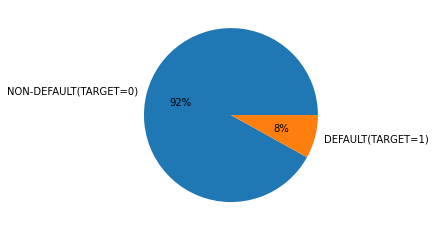

In [183]:
plt.pie(a,labels=["NON-DEFAULT(TARGET=0)","DEFAULT(TARGET=1)"],autopct='%1.f%%')
plt.show()

<p style="color:blue"> <b>Insight : </b>We can see here that 8% is defaulter and 92% is non defaulter here.

#### Univariate Analysis

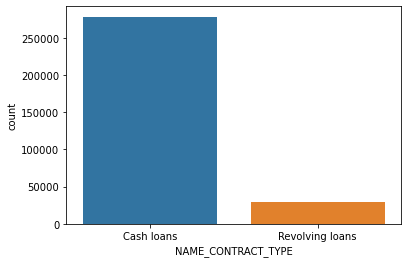

In [184]:
sns.countplot(df1["NAME_CONTRACT_TYPE"])
plt.show()

<p style="color:blue"> <b>Insight : </b> We can see bank provides most of the cash loans

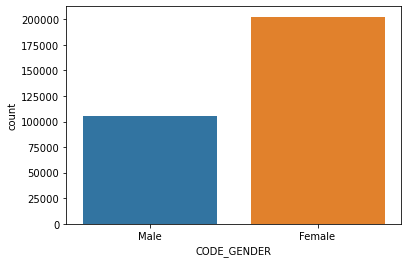

In [185]:
sns.countplot(df1["CODE_GENDER"])
plt.show()

<p style="color:blue"> <b>Insight : </b>Bank provides more loan to Female compare to male

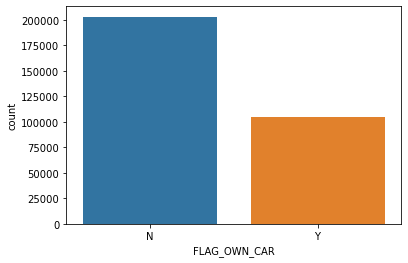

In [186]:
sns.countplot(df1["FLAG_OWN_CAR"])
plt.show()

<p style="color:blue"> <b>Insight : </b> 50% more people do not have car 

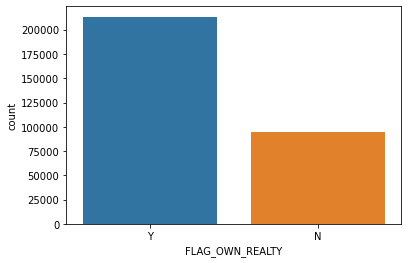

In [187]:
sns.countplot(df1["FLAG_OWN_REALTY"])
plt.show()

<p style="color:blue"> <b>Insight : </b> More % of people own reality

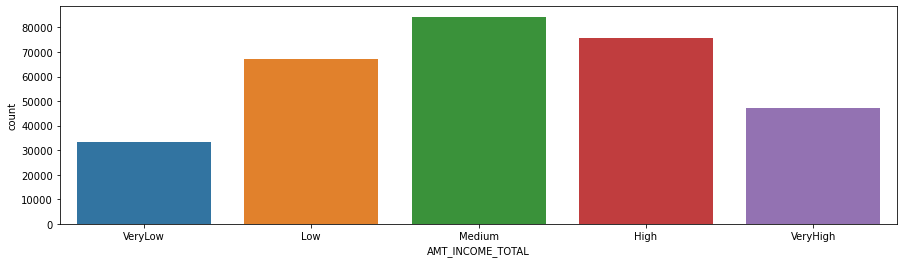

In [188]:
fig = plt.figure(figsize=(15,4))
sns.countplot(df1["AMT_INCOME_TOTAL"])
plt.show()

<p style="color:blue"> <b>Insight : </b> we can see some loan provider have very low Income.

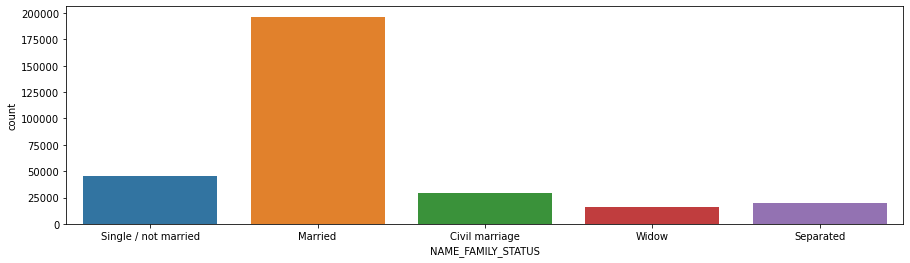

In [189]:
fig = plt.figure(figsize=(15,4))
sns.countplot(df1["NAME_FAMILY_STATUS"])
plt.show()

<p style="color:blue"> <b>Insight : </b>Most of the Loan was provided to married person.

<AxesSubplot:xlabel='AGE_group', ylabel='count'>

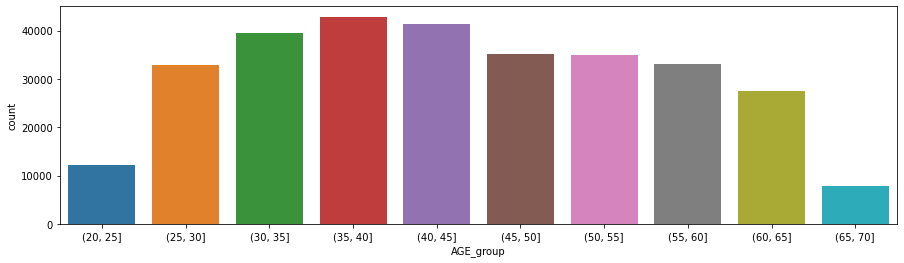

In [190]:
fig = plt.figure(figsize=(15,4))
sns.countplot(df1["AGE_group"])

<p style="color:blue"> <b>Insight : </b>Age group 20-25 and 65-70 are provided less loan.

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

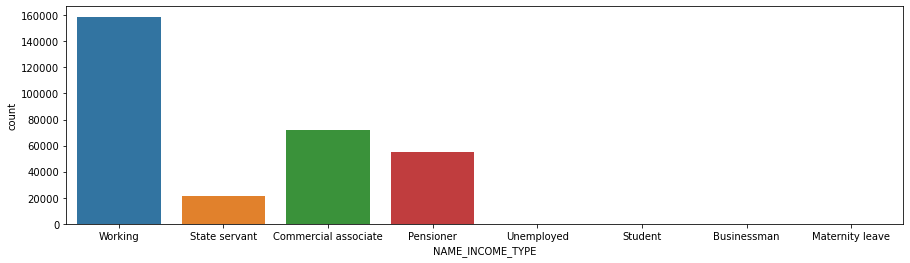

In [191]:
fig = plt.figure(figsize=(15,4))
sns.countplot(df1["NAME_INCOME_TYPE"])

<p style="color:blue"> <b>Insight : </b> Unemployed,Student,Businessman,Maternity Leave are provided very less loan.

#### Segmented Univariate Analysis

In [192]:
df10=df1[df1["TARGET"]==0]   #Non-Defaulter
df11=df1[df1["TARGET"]==1]   #Defaulter

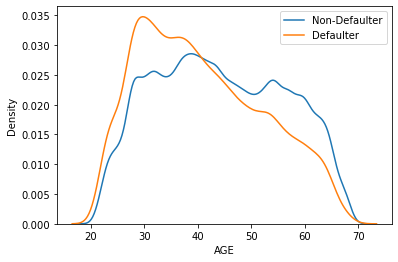

In [193]:
sns.distplot(df10['AGE'],hist=False,label='Non-Defaulter')
sns.distplot(df11['AGE'],hist=False,label='Defaulter')
plt.legend()
plt.show()

<p style="color:blue"> <b>Insight : </b> If we see Age Defaulter is higher in 20-40 age

Text(0.5, 1.0, 'defalter')

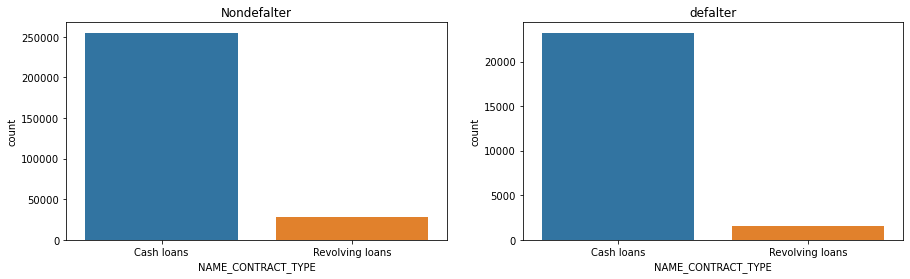

In [194]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Nondefalter")
sns.countplot(df10["NAME_CONTRACT_TYPE"])

plt.subplot(1, 2, 2)
sns.countplot(df11["NAME_CONTRACT_TYPE"])
plt.title("defalter")

<p style="color:blue"> <b>Insight : </b> Both the plot seems similar

Text(0.5, 1.0, 'defalter')

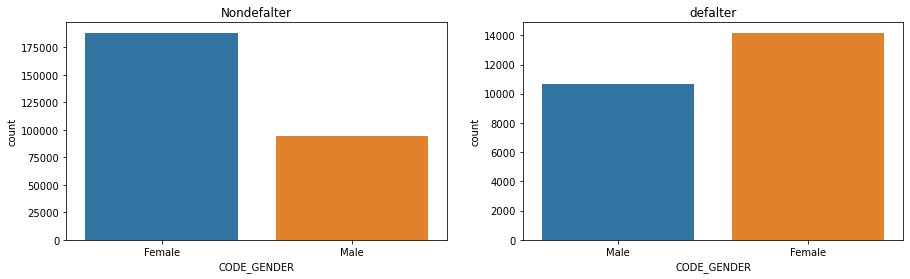

In [195]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Nondefalter")
sns.countplot(df10["CODE_GENDER"])

plt.subplot(1, 2, 2)
sns.countplot(df11["CODE_GENDER"])
plt.title("defalter")

<p style="color:blue"> <b>Insight : </b> Female is more in numbers in both catagory Nondefalter and Nondefalter

Text(0.5, 1.0, 'defalter')

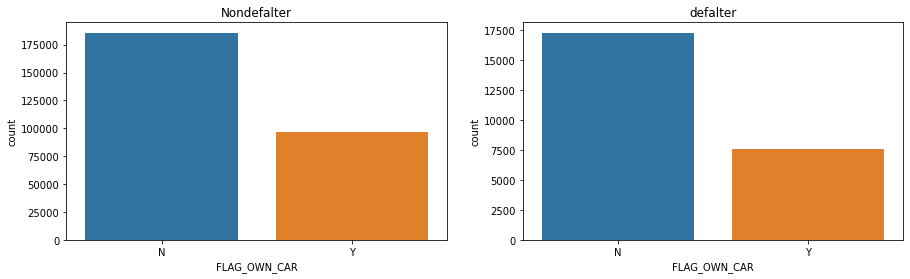

In [196]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Nondefalter")
sns.countplot(df10["FLAG_OWN_CAR"])

plt.subplot(1, 2, 2)
sns.countplot(df11["FLAG_OWN_CAR"])
plt.title("defalter")

Text(0.5, 1.0, 'defalter')

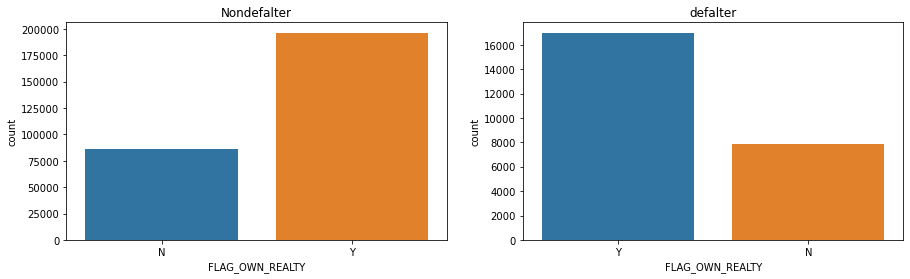

In [197]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Nondefalter")
sns.countplot(df10["FLAG_OWN_REALTY"])

plt.subplot(1, 2, 2)
sns.countplot(df11["FLAG_OWN_REALTY"])
plt.title("defalter")


Text(0.5, 1.0, 'defalter')

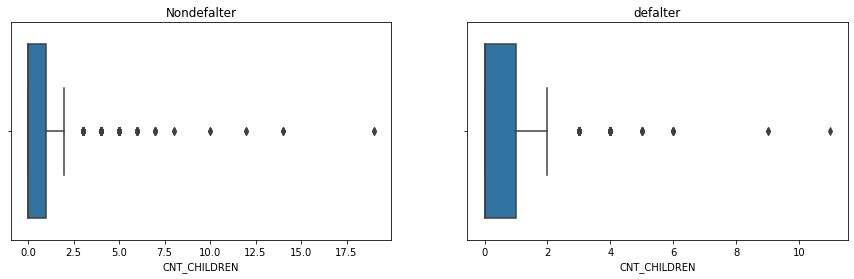

In [198]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Nondefalter")
sns.boxplot(df10["CNT_CHILDREN"])

plt.subplot(1, 2, 2)
sns.boxplot(df11["CNT_CHILDREN"])
plt.title("defalter")


<p style="color:blue"> <b>Insight : </b> Both Plots looks similar but Nondefalters Having More outliers

Text(0.5, 1.0, 'defalter')

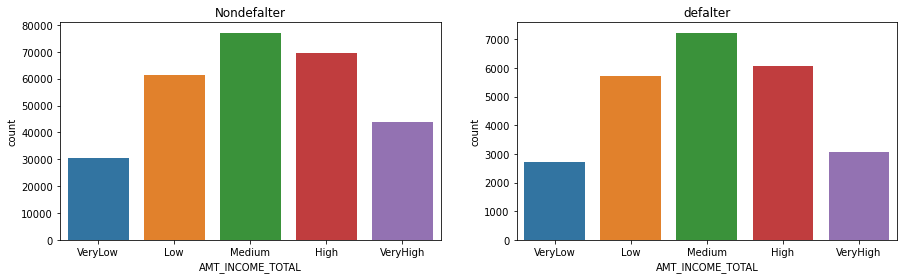

In [199]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Nondefalter")
sns.countplot(df10["AMT_INCOME_TOTAL"])

plt.subplot(1, 2, 2)
sns.countplot(df11["AMT_INCOME_TOTAL"])
plt.title("defalter")

<p style="color:blue"> <b>Insight : </b> most of the loan distributed between low medium high veryhigh for both defalter and non-defalter but very low income people is provided loan too

Text(0.5, 1.0, 'defalter')

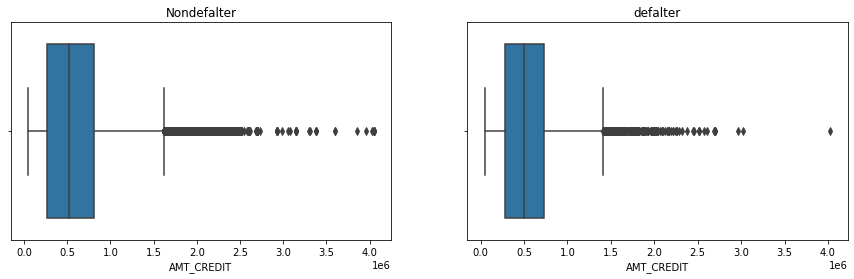

In [200]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Nondefalter")
sns.boxplot(df10["AMT_CREDIT"])

plt.subplot(1, 2, 2)
sns.boxplot(df11["AMT_CREDIT"])
plt.title("defalter")

<p style="color:blue"> <b>Insight : </b> Defalter shows very intresting pettern as distribution of outliers is not uniform.

Text(0.5, 1.0, 'defalter')

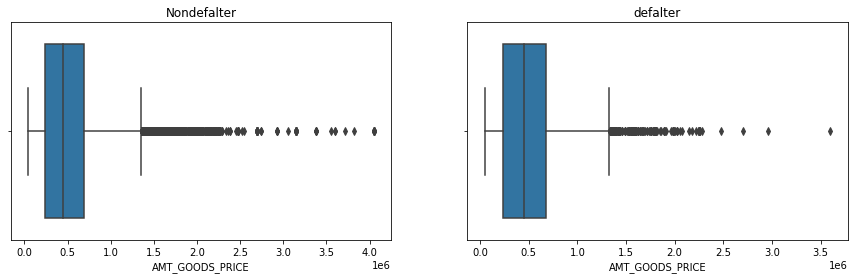

In [201]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Nondefalter")
sns.boxplot(df10["AMT_GOODS_PRICE"])

plt.subplot(1, 2, 2)
sns.boxplot(df11["AMT_GOODS_PRICE"])
plt.title("defalter")

<p style="color:blue"> <b>Insight : </b> Defalter shows very intresting pettern as distribution of outliers is not uniform.

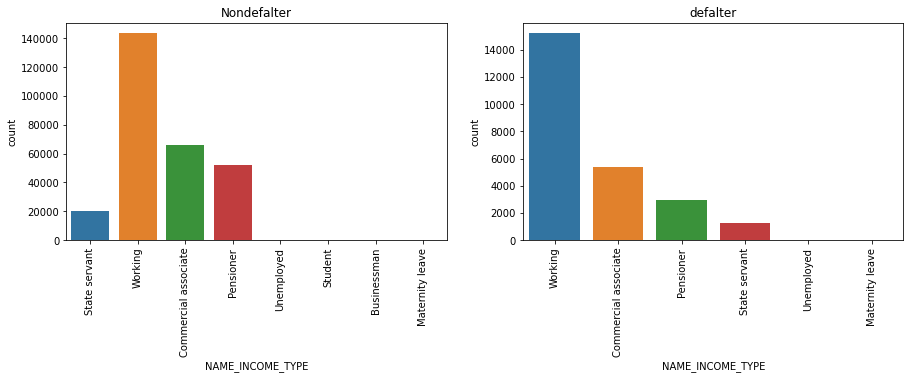

In [202]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Nondefalter")
sns.countplot(df10["NAME_INCOME_TYPE"])
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
plt.title("defalter")
sns.countplot(df11["NAME_INCOME_TYPE"])
plt.xticks(rotation=90)
plt.show()

<p style="color:blue"> <b>Insight : </b> I we observe the graph we can see provides the loan to those who are working. but most of the defalter and non-defalters are distributed between working, commercial associate, pensioner, state servent.

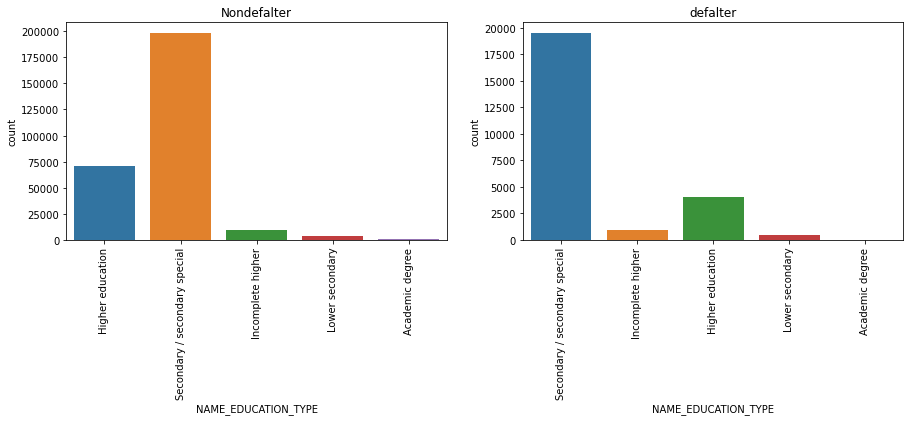

In [203]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Nondefalter")
sns.countplot(df10["NAME_EDUCATION_TYPE"])
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
plt.title("defalter")
sns.countplot(df11["NAME_EDUCATION_TYPE"])
plt.xticks(rotation=90)
plt.show()

<p style="color:blue"> <b>Insight : </b> Academic degree holders are not Defalter. even though bank provide very less number of loans to them.

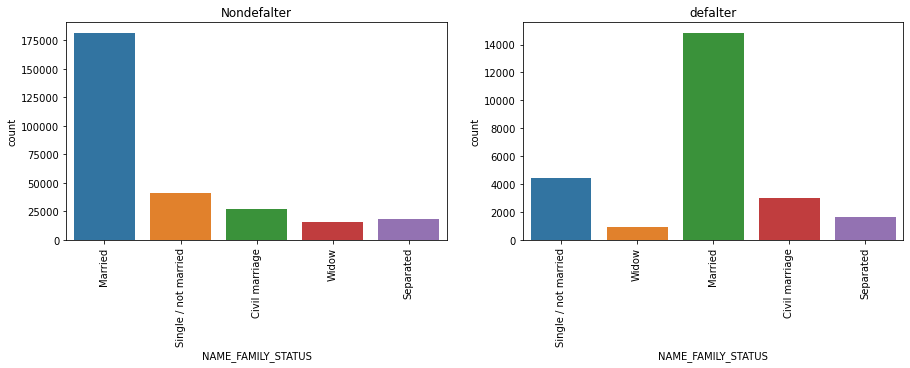

In [204]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Nondefalter")
sns.countplot(df10["NAME_FAMILY_STATUS"])
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
plt.title("defalter")
sns.countplot(df11["NAME_FAMILY_STATUS"])
plt.xticks(rotation=90)
plt.show()

<p style="color:blue"> <b>Insight : </b> Both plots having equal distribution to all areas.

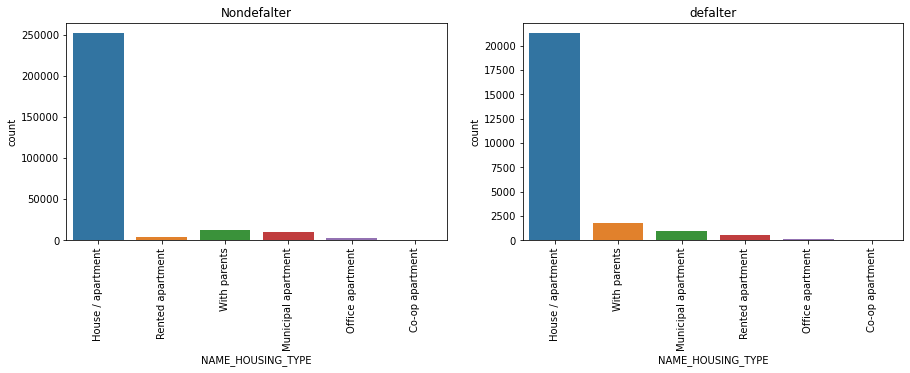

In [205]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Nondefalter")
sns.countplot(df10["NAME_HOUSING_TYPE"])
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
plt.title("defalter")
sns.countplot(df11["NAME_HOUSING_TYPE"])
plt.xticks(rotation=90)
plt.show()

<p style="color:blue"> <b>Insight : </b> Bank provides the loan those who owns house/apartment.

<AxesSubplot:title={'center':'defaulter'}, xlabel='YEARS_REGISTRATION'>

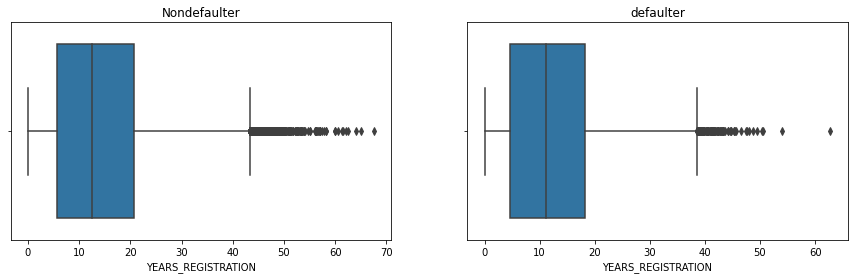

In [206]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Nondefaulter")
sns.boxplot(df10["YEARS_REGISTRATION"])
plt.subplot(1, 2, 2)
plt.title("defaulter")
sns.boxplot(df11["YEARS_REGISTRATION"])

<p style="color:blue"> <b>Insight : </b> Defalter and Non-defalter shows same type of distribution of outliers.

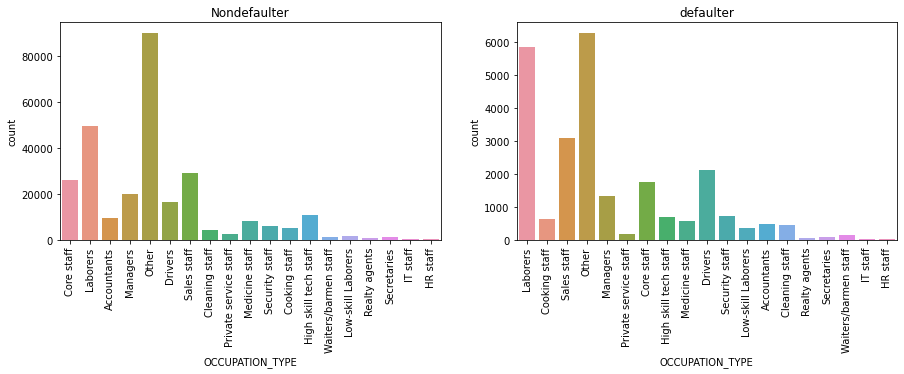

In [207]:

fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Nondefaulter")
sns.countplot(df10["OCCUPATION_TYPE"])
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
plt.title("defaulter")
sns.countplot(df11["OCCUPATION_TYPE"])
plt.xticks(rotation=90)
plt.show()


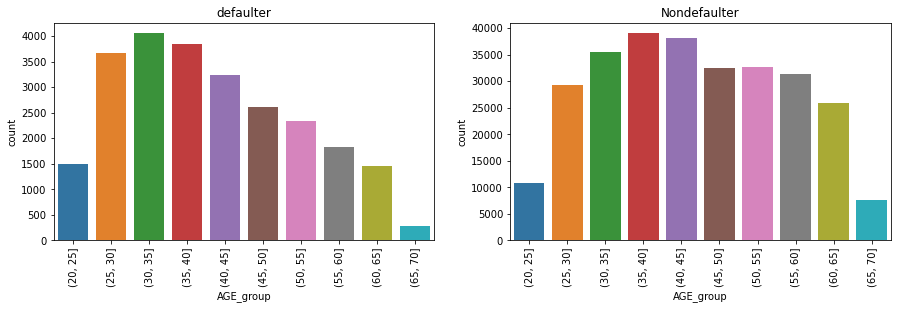

In [208]:
fig = plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("defaulter")
plt.xticks(rotation=90)
sns.countplot(df11["AGE_group"])
plt.subplot(1, 2, 2)
plt.title("Nondefaulter")
sns.countplot(df10["AGE_group"])
plt.xticks(rotation=90)
plt.show()

#### Bivariant Analysis 

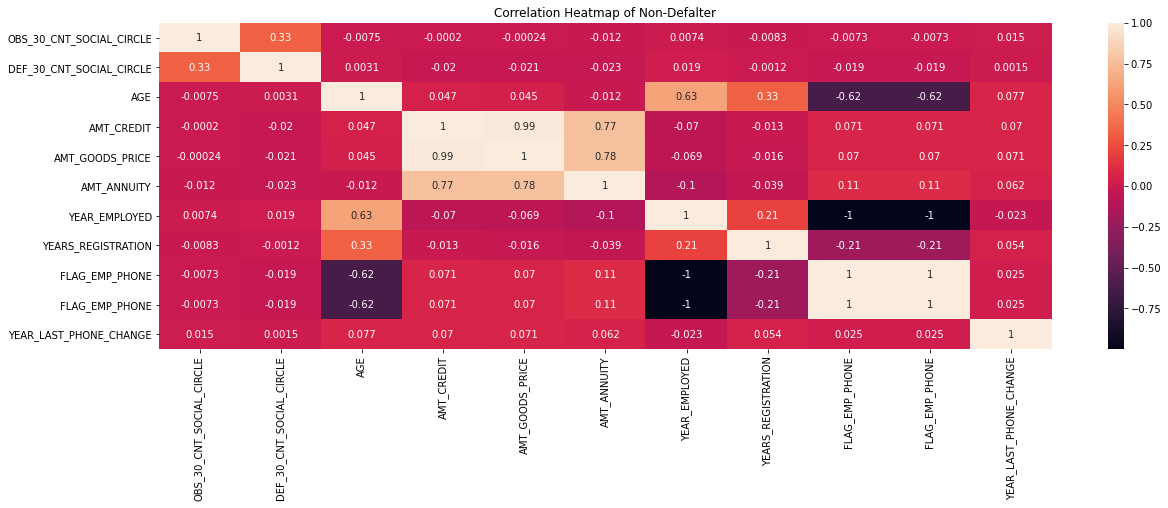

In [209]:
plt.figure(figsize=(20,6))
plt.title("Correlation Heatmap of Non-Defalter")
sns.heatmap(df10[["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","AGE","AMT_CREDIT","AMT_GOODS_PRICE","AMT_ANNUITY","YEAR_EMPLOYED","YEARS_REGISTRATION","FLAG_EMP_PHONE","FLAG_EMP_PHONE","YEAR_LAST_PHONE_CHANGE"]].corr(),annot=True)
plt.show()

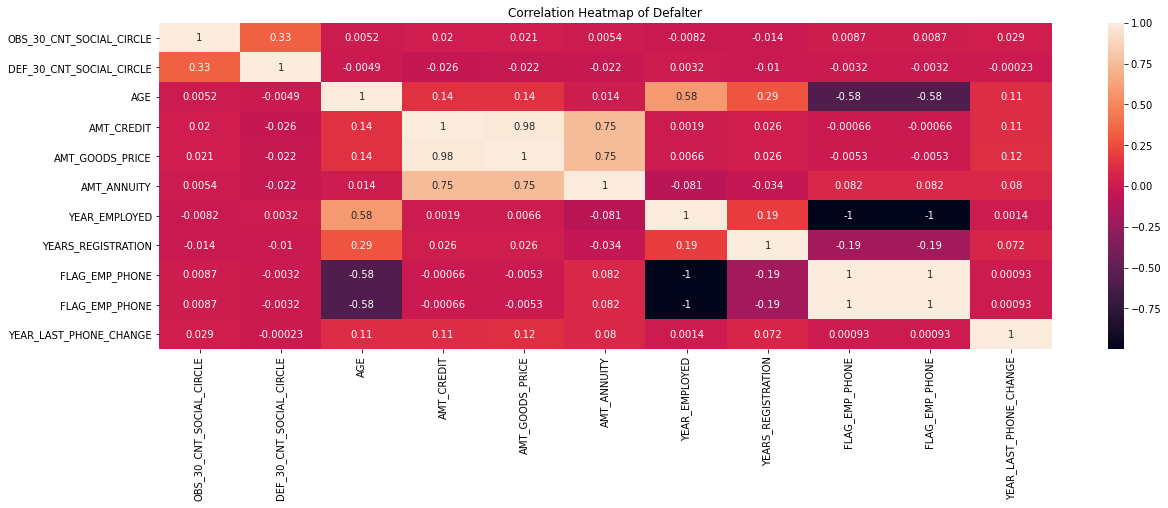

In [210]:
plt.figure(figsize=(20,6))
plt.title("Correlation Heatmap of Defalter")
sns.heatmap(df11[["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","AGE","AMT_CREDIT","AMT_GOODS_PRICE","AMT_ANNUITY","YEAR_EMPLOYED","YEARS_REGISTRATION","FLAG_EMP_PHONE","FLAG_EMP_PHONE","YEAR_LAST_PHONE_CHANGE"]].corr(),annot=True)
plt.show()

#### Read Previous_Application Data CSV File

In [211]:
pf=pd.read_csv(r"C:\Users\Meha Rusia\Desktop\EDA Assignment\Credit EDA Case Study-20220222T161749Z-001\Credit EDA Case Study\previous_application.csv")

In [212]:
pf.shape

(1670214, 37)

In [213]:
pf.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [214]:
pf.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [215]:
pf.drop_duplicates().shape

(1670214, 37)

In [216]:
temp1=(pf.isnull().sum()*100/len(pf)).sort_values(ascending=False).reset_index().rename(columns={"index":"column_name",0:"% of Missing Values"})
temp1

,column_name,% of Missing Values
0,RATE_INTEREST_PRIVILEGED,99.643698
1,RATE_INTEREST_PRIMARY,99.643698
2,AMT_DOWN_PAYMENT,53.636480
3,RATE_DOWN_PAYMENT,53.636480
4,NAME_TYPE_SUITE,49.119754
5,NFLAG_INSURED_ON_APPROVAL,40.298129
6,DAYS_TERMINATION,40.298129
7,DAYS_LAST_DUE,40.298129
8,DAYS_LAST_DUE_1ST_VERSION,40.298129
9,DAYS_FIRST_DUE,40.298129


In [217]:
drop_col1=list(temp1[temp1["% of Missing Values"]>=40]["column_name"])
drop_col1

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [218]:
pf1=pf.drop(drop_col1,axis=1)
pf1.shape

(1670214, 26)

In [219]:
#new datafram
pf1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,1,XAP,Approved,-544,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,1,XAP,Approved,-1694,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,1,XAP,Approved,-1488,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,1,XNA,Approved,-1185,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


In [220]:
miss1=list(temp1[temp1["% of Missing Values"]<13]["column_name"] )
miss2=list(temp1[temp1["% of Missing Values"]>0]["column_name"])
null1_as_set = set(miss1)
intersection =null1_as_set.intersection(miss2)
intersection  #null value geater than 0% and less than 13%

{'AMT_CREDIT', 'PRODUCT_COMBINATION'}

<p style="color:blue">INSIGHT : These Column Value Need To Be Fixed As They Have less than 13% Missing Values

In [221]:
pf1["AMT_CREDIT"].isnull().sum()

1

80541.0

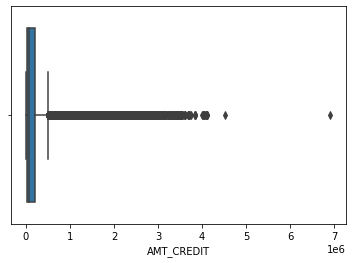

In [222]:
sns.boxplot(pf1["AMT_CREDIT"])
pf1["AMT_CREDIT"].median()

<p style="color:blue"> as AMT_CREDIT column has lots of outliers so fixing null value with median

In [223]:
pf1["AMT_CREDIT"]=pf1["AMT_CREDIT"].fillna(80541.0)

In [224]:
pf1["PRODUCT_COMBINATION"].isnull().sum()

346

In [225]:
pf1["PRODUCT_COMBINATION"].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [226]:
pf1["PRODUCT_COMBINATION"].mode()

0    Cash
dtype: object

<p style="color:blue"> as PRODUCT_COMBINATION column as its a categorial column so mode will be the good option for that

In [227]:
pf1["PRODUCT_COMBINATION"]=pf1["PRODUCT_COMBINATION"].fillna("Cash")

In [228]:
#Dropping Unwanted Columns
pf1.drop(["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY","CODE_REJECT_REASON","NAME_GOODS_CATEGORY","NAME_PORTFOLIO","SELLERPLACE_AREA","NAME_SELLER_INDUSTRY","PRODUCT_COMBINATION"],axis='columns', inplace=True)

In [229]:
pf1.shape

(1670214, 16)

<p style="color:blue"> <b>Insight : </b> Here I dropped all columns which I am not going to use in my analysis.now new dataset has 1670214 rows × 16 columns.

In [230]:
#Removing Negative Values
pf1["DAYS_DECISION"]=pf1["DAYS_DECISION"].astype(int)
pf1[["DAYS_DECISION"]] = pf1[["DAYS_DECISION"]].abs()

In [231]:
#correcting Data Type
pf1.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NAME_CONTRACT_TYPE         object
AMT_ANNUITY               float64
AMT_APPLICATION           float64
AMT_CREDIT                float64
AMT_GOODS_PRICE           float64
NAME_CASH_LOAN_PURPOSE     object
NAME_CONTRACT_STATUS       object
DAYS_DECISION               int32
NAME_PAYMENT_TYPE          object
NAME_CLIENT_TYPE           object
NAME_PRODUCT_TYPE          object
CHANNEL_TYPE               object
CNT_PAYMENT               float64
NAME_YIELD_GROUP           object
dtype: object

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

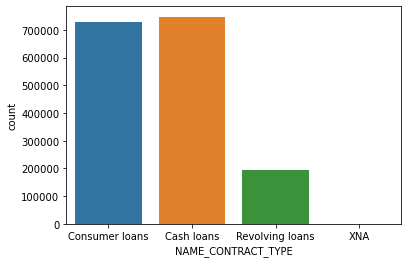

In [232]:
sns.countplot(pf1["NAME_CONTRACT_TYPE"])

<AxesSubplot:xlabel='AMT_ANNUITY'>

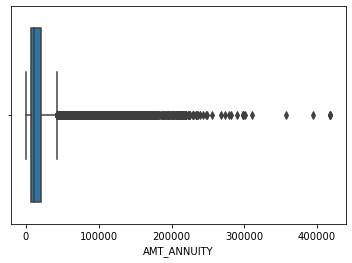

In [233]:
sns.boxplot(pf1["AMT_ANNUITY"])

<AxesSubplot:xlabel='AMT_CREDIT'>

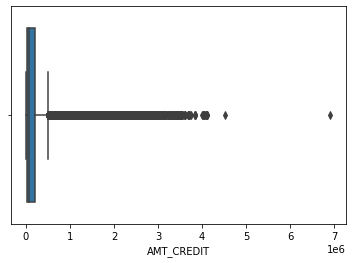

In [234]:
sns.boxplot(pf1["AMT_CREDIT"])

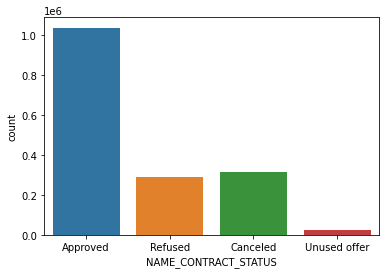

In [235]:
sns.countplot(pf1["NAME_CONTRACT_STATUS"])
plt.show()

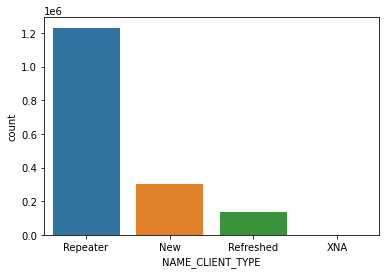

In [236]:
sns.countplot(pf1["NAME_CLIENT_TYPE"])
plt.show()

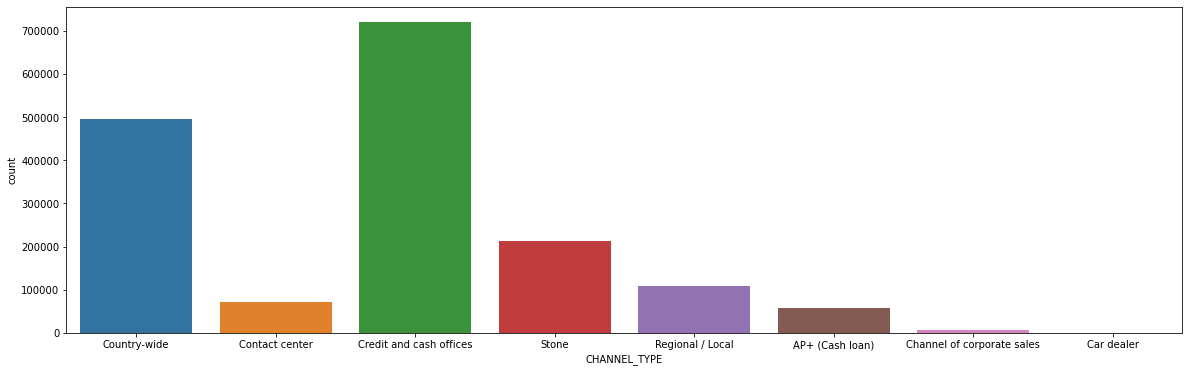

In [237]:
plt.figure(figsize=(20,6))
sns.countplot(pf1["CHANNEL_TYPE"])
plt.show()

<AxesSubplot:xlabel='CNT_PAYMENT'>

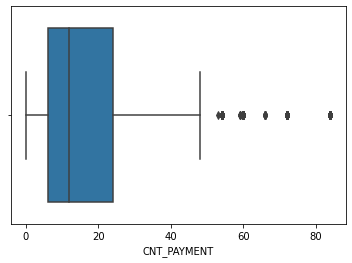

In [238]:
sns.boxplot(pf1["CNT_PAYMENT"])

<AxesSubplot:xlabel='NAME_YIELD_GROUP', ylabel='count'>

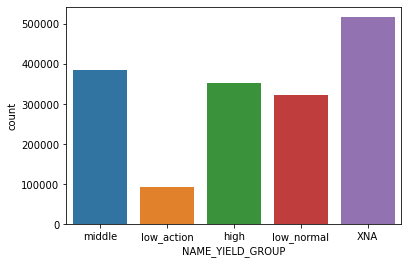

In [239]:
sns.countplot(pf1["NAME_YIELD_GROUP"])

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='CNT_PAYMENT'>

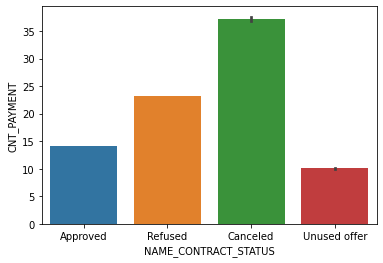

In [240]:
sns.barplot(pf1["NAME_CONTRACT_STATUS"],pf1["CNT_PAYMENT"])

<p style="color:blue"> <b>Insight : </b> 1. Most client opt for cash Loan even A good number of client went for consumer loans.
    2. AMT_ANNUITY and AMT_CREDIT have lots of outliers.
    3. Bank approve large number of loans.
    4. Bank Provide more loans to his repeated customers and new and refresher is in very less numbers.
    5. most of the bank acquired the client with the cash and credit offices and country wide on the previous application
    6. CNT_PAYMENT has lots of outliers.
    7. Bank provides middle and high intrest rate but there is large number of NULL value present bank should keep data.
    8. ON the basis of previous credit bank cancle and refused most of the loans only 15% is approved.
    

<b>StoryTeller- MEHA RUSIA